## **ADIPURUSH MOVIE ANALYSIS**

this analysis is done by Sakshi K More

loading all the required libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
from langdetect import detect
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from ipywidgets import interact
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


loading the movie dataset

In [7]:
data=pd.read_csv("adipurush_tweets.csv")
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweets
0,2023-06-30 09:21:00+00:00,0,NaN,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...
1,2023-06-30 09:20:57+00:00,0,NaN,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...
2,2023-06-30 09:20:22+00:00,0,NaN,@ponilemova #Adipurush
3,2023-06-30 09:20:00+00:00,3,NaN,Adipurush VS 72 Hoorain VS The Kerala Story Co...
4,2023-06-30 09:15:22+00:00,3,NaN,ST: #Adipurush https://t.co/lsGKcgQuKL


getting the shape of the dataset

In [8]:
data.shape

(10001, 4)

getting the columns of the dataset

In [ ]:
data.columns

Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweets'], dtype='object')

getting the information of the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Created     10001 non-null  object 
 1   Number of Likes  10001 non-null  int64  
 2   Source of Tweet  0 non-null      float64
 3   Tweets           10001 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.7+ KB


dropping the unnecessay columns from the dataset

In [10]:
data=data.drop("Source of Tweet",axis=1)

In [11]:
data.columns

Index(['Date Created', 'Number of Likes', 'Tweets'], dtype='object')

checking if the data contains any duplicated value

In [12]:
data.duplicated().sum()

1

this shows that the data contains one duplicated value lets drop it

In [13]:
data.drop_duplicates(inplace=True,keep='first')

checking the data dtypes of the columns of the dataset

In [14]:
data.dtypes

Date Created       object
Number of Likes     int64
Tweets             object
dtype: object

converting the date created column into datetime format

In [15]:
data['Date Created']=pd.to_datetime(data['Date Created'])

creating a new column called date and storing only the date in it

In [16]:
data['Date']=data['Date Created'].dt.date

converting that newly created date column into datetime format. After that create 3 new columns that have day, month and year in it

In [17]:
data['Date']=pd.to_datetime(data['Date'])

In [18]:
data['Day']=data['Date'].dt.day

In [19]:
data['Month']=data['Date'].dt.month

In [20]:
data['Year']=data['Date'].dt.year

converting the date created column that is the original date column of the dataset into specific format

In [21]:
data['Date Created']=data['Date Created'].dt.strftime('%Y-%m-%d %H:%M:%S')

extracting only time from date created column using the split method and storing it in a new column

In [22]:
time=[]
for x in data['Date Created']:
  y=x.split(" ")
  time .append(y[1])


In [23]:
data['Time']=time

converting the newly created time column into date and time format and then creating 3 new columns that have hours, minutes and seconds in it

In [24]:
data['Time']=pd.to_datetime(data['Time'])

In [25]:
data['Hour']=data['Time'].dt.hour

In [26]:
data['Minutes']=data['Time'].dt.minute

In [27]:
data['Seconds']=data['Time'].dt.second

In [28]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22


In [29]:
data.dtypes

Date Created               object
Number of Likes             int64
Tweets                     object
Date               datetime64[ns]
Day                         int64
Month                       int64
Year                        int64
Time               datetime64[ns]
Hour                        int64
Minutes                     int64
Seconds                     int64
dtype: object

checking the maximum and minimum date of the tweets posted for the movie

In [30]:
data['Date Created'].max()

'2023-06-30 09:21:00'

In [31]:
data['Date Created'].min()

'2023-06-23 10:07:45'

getting the description of the data i.e the means,std,min,max,quantiles,etc

In [32]:
data.describe()

,Number of Likes,Day,Month,Year,Hour,Minutes,Seconds
count,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000
mean,73.544500,25.842800,6.0,2023.0,10.369100,29.195600,28.785900
std,369.705682,2.011888,0.0,0.0,4.957693,17.175752,17.687548
min,0.000000,23.000000,6.0,2023.0,0.000000,0.000000,0.000000
25%,0.000000,24.000000,6.0,2023.0,6.000000,14.000000,13.000000
50%,1.000000,26.000000,6.0,2023.0,11.000000,30.000000,29.000000
75%,9.000000,28.000000,6.0,2023.0,14.000000,44.000000,44.000000
max,14778.000000,30.000000,6.0,2023.0,23.000000,59.000000,59.000000


**EXPLORATORY DATA ANALYSIS**

creating a count plot that shows the count of tweets as per days

In [35]:
data['Date Created']=pd.to_datetime(data['Date Created'])

In [36]:
data['Date']=data['Date Created'].dt.date

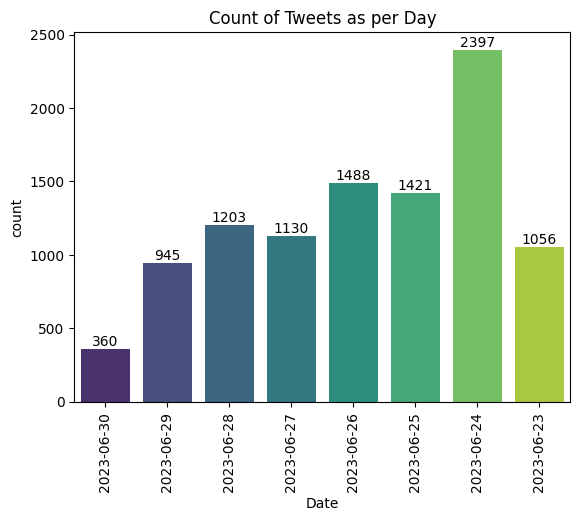

In [37]:
ax=sns.countplot(x='Date',data=data,palette='viridis')
plt.title("Count of Tweets as per Day")
plt.xticks(rotation=90)
for bars in ax.containers:
  ax.bar_label(bars)

this graph shows that the higgest number of tweets were done on 24th june and lowest tweets were done on 30th june

creating a count plot that shows the number of tweets per hour for the specific day selected by the user

In [39]:

@interact(day_req=data['Day'].unique())
def analysis(day_req):
  # Filter dataframe based on the selected day

  filtered_df = data[data['Day'] == day_req]
  #Extract time from datetime and create countplot
  plt.figure(figsize=(10, 6))
  ax=sns.countplot(x='Hour',data=filtered_df,palette='viridis')
  plt.title(f"Countplot of Tweets for {day_req} June")
  plt.xlabel("Hour of the day")
  plt.ylabel("Count of Tweets")
  plt.show()

interactive(children=(Dropdown(description='day_req', options=(30, 29, 28, 27, 26, 25, 24, 23), value=30), Out…

lets clean the tweets

In [40]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22


In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

lets create a function that will clean the tweets and then store it in a new column

In [42]:
def transform_texts(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if not i.isdigit():
      y.append(i)
  return " ".join(y)

testing the above function by some random text

In [43]:
transform_texts("Finally!!! A new game 100 % !! yeah")

'finally new game yeah'

In [44]:
data['Cleaned_Tweets']=data['Tweets']

In [45]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds,Cleaned_Tweets
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22,@ponilemova #Adipurush
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0,Adipurush VS 72 Hoorain VS The Kerala Story Co...
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22,ST: #Adipurush https://t.co/lsGKcgQuKL


In [46]:
data['Cleaned_Tweets']=data['Cleaned_Tweets'].apply(lambda x:transform_texts(x))

In [47]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds,Cleaned_Tweets
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0,engvaus engvsaus ausveng ausvseng adipurush as...
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57,playing book ticket gopalancinemas movies adip...
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22,ponilemova adipurush
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0,adipurush vs hoorain vs kerala story controver...
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22,st adipurush https


checking the data types of the columns of the dataset

In [48]:
data.dtypes

Date Created       datetime64[ns]
Number of Likes             int64
Tweets                     object
Date                       object
Day                         int64
Month                       int64
Year                        int64
Time               datetime64[ns]
Hour                        int64
Minutes                     int64
Seconds                     int64
Cleaned_Tweets             object
dtype: object

lets tokenize this newly created cleaned tweets column

In [49]:
data['Cleaned_Tweets']=data['Cleaned_Tweets'].apply(lambda x:word_tokenize(x))

In [50]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds,Cleaned_Tweets
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0,"[engvaus, engvsaus, ausveng, ausvseng, adipuru..."
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57,"[playing, book, ticket, gopalancinemas, movies..."
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22,"[ponilemova, adipurush]"
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0,"[adipurush, vs, hoorain, vs, kerala, story, co..."
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22,"[st, adipurush, https]"


In [51]:
data.dtypes

Date Created       datetime64[ns]
Number of Likes             int64
Tweets                     object
Date                       object
Day                         int64
Month                       int64
Year                        int64
Time               datetime64[ns]
Hour                        int64
Minutes                     int64
Seconds                     int64
Cleaned_Tweets             object
dtype: object

now using the textblob , we will categorize tweets into 'positive' , 'negative' or 'neutral'

In [52]:
def analyze(text):
    # Create a TextBlob object with the tweet
    blob = TextBlob(text)

    # Perform sentiment analysis using the polarity property
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


creating a new column of category

In [53]:
data['Category']=data['Tweets'].apply(analyze)

In [54]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds,Cleaned_Tweets,Category
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0,"[engvaus, engvsaus, ausveng, ausvseng, adipuru...",Positive
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57,"[playing, book, ticket, gopalancinemas, movies...",Neutral
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22,"[ponilemova, adipurush]",Neutral
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0,"[adipurush, vs, hoorain, vs, kerala, story, co...",Neutral
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22,"[st, adipurush, https]",Neutral


counts the category of tweets

In [55]:
data['Category'].value_counts()

Neutral     5798
Positive    3213
Negative     989
Name: Category, dtype: int64

this shows that there are more numbe rof neutral tweets

lets create a plot for the category of tweets for better understanding

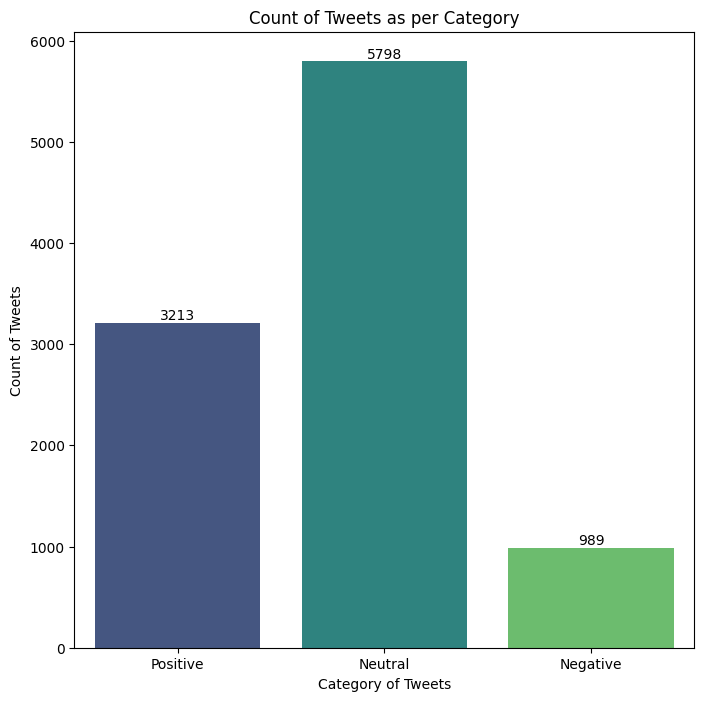

In [56]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Category',data=data,palette='viridis')
plt.title("Count of Tweets as per Category")
plt.xlabel('Category of Tweets')
plt.ylabel('Count of Tweets')
for bars in ax.containers:
    ax.bar_label(bars)

creating a new column that represnts int number for the category

In [69]:
data['Category_label']=data['Category'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [70]:
data.head()

,Date Created,Number of Likes,Tweets,Date,Day,Month,Year,Time,Hour,Minutes,Seconds,Cleaned_Tweets,Category,Category_label
0,2023-06-30 09:21:00,0,#ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...,2023-06-30,30,6,2023,2023-07-09 09:21:00,9,21,0,"[engvaus, engvsaus, ausveng, ausvseng, adipuru...",Positive,1
1,2023-06-30 09:20:57,0,Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...,2023-06-30,30,6,2023,2023-07-09 09:20:57,9,20,57,"[playing, book, ticket, gopalancinemas, movies...",Neutral,0
2,2023-06-30 09:20:22,0,@ponilemova #Adipurush,2023-06-30,30,6,2023,2023-07-09 09:20:22,9,20,22,"[ponilemova, adipurush]",Neutral,0
3,2023-06-30 09:20:00,3,Adipurush VS 72 Hoorain VS The Kerala Story Co...,2023-06-30,30,6,2023,2023-07-09 09:20:00,9,20,0,"[adipurush, vs, hoorain, vs, kerala, story, co...",Neutral,0
4,2023-06-30 09:15:22,3,ST: #Adipurush https://t.co/lsGKcgQuKL,2023-06-30,30,6,2023,2023-07-09 09:15:22,9,15,22,"[st, adipurush, https]",Neutral,0


create a new column for cleaned tweets for model creation

In [71]:
data['CT']=data['Tweets'].apply(transform_texts)

# New Section

In [66]:
tfidf=TfidfVectorizer()

In [72]:
x=tfidf.fit_transform(data['CT']).toarray()

In [73]:
y=data['Category_label'].values

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [88]:

gnb=GaussianNB()

In [77]:
gnb.fit(x_train,y_train)

GaussianNB()

In [78]:
predicted_1=gnb.predict(x_test)

In [79]:
acc_score_gnb=accuracy_score(y_test,predicted_1)

In [80]:
acc_score_gnb

0.4835

In [81]:
lr=LogisticRegression()

In [82]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
predicted_2=lr.predict(x_test)

In [84]:
acc_score_lr=accuracy_score(y_test,predicted_2)

In [85]:
acc_score_lr

0.839

In [86]:
print('Accuracy score with GaussianNB model is : ',acc_score_gnb)
print('Accuracy score with Logistic Regression model is : ',acc_score_lr)

Accuracy score with GaussianNB model is :  0.4835
Accuracy score with Logistic Regression model is :  0.839


from the above statements we can see that losgistic regression model works well with tweet analysis then the gaussianNB model

using streamlit for web app

In [57]:
st.title("Tweet Analyzer")

2023-07-09 10:05:45.318 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [59]:
input=st.text_input("Enter the Tweet")

submit=st.button('SUBMIT')

if submit:
  text=analyze(input)
  print("The tweet is : ",text)